In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import os

C:\Users\Lenovo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


###　アニメーションを単色画像に変更する

In [3]:
gif = Image.open('gif\\man.gif')
output_folder = 'gif\\img_man'
os.makedirs(output_folder, exist_ok=True)

for i in range(gif.n_frames):
    gif.seek(i)
    frame = gif.copy()
    frame = frame.convert('L')
    frame.save(os.path.join(output_folder, f'frame_{i+1:03d}.png'),'PNG')
gif.close()

### Fig.6 P PID PID_sigmoid

In [17]:
fr = 16
st = 10
psnr_P = []
ssim_P = []
for frame in range(0,fr):
    # fr: 0 to 15
    img_org = cv2.imread(f'gif\\img_man\\frame_{frame+1:03d}.png', cv2.IMREAD_GRAYSCALE)
    for ite in range(1,st+1):
        img_ms = cv2.imread(f'chatrad_result\\man\\P\\frame_{frame+1}_step_{ite}.png', cv2.IMREAD_GRAYSCALE)
        PSNR = cv2.PSNR(img_org, img_ms)
        psnr_P.append(PSNR)
        SSIM = ssim(img_org, img_ms)
        ssim_P.append(SSIM)
psnr_PID = []
ssim_PID = []
for frame in range(0,fr):
    # fr: 0 to 15
    img_org = cv2.imread(f'gif\\img_man\\frame_{frame+1:03d}.png', cv2.IMREAD_GRAYSCALE)
    for ite in range(1,st+1):
        img_ms = cv2.imread(f'chatrad_result\\man\\PID\\frame_{frame+1}_step_{ite}.png', cv2.IMREAD_GRAYSCALE)
        PSNR = cv2.PSNR(img_org, img_ms)
        psnr_PID.append(PSNR)
        SSIM = ssim(img_org, img_ms)
        ssim_PID.append(SSIM)
psnr_P_sig_ID = []
ssim_P_sig_ID = []
for frame in range(0,fr):
    # fr: 0 to 15
    img_org = cv2.imread(f'gif\\img_man\\frame_{frame+1:03d}.png', cv2.IMREAD_GRAYSCALE)
    for ite in range(1,st+1):
        img_ms = cv2.imread(f'chatrad_result\\man\\PID_sig\\frame_{frame+1}_step_{ite}.png', cv2.IMREAD_GRAYSCALE)
        PSNR = cv2.PSNR(img_org, img_ms)
        psnr_P_sig_ID.append(PSNR)
        SSIM = ssim(img_org, img_ms)
        ssim_P_sig_ID.append(SSIM)

In [ ]:
line_styles = ['-.', '--', '-.', '-']
colors = ['pink', 'g', 'r', 'purple', 'm', 'y', 'k', 'b', 'c']

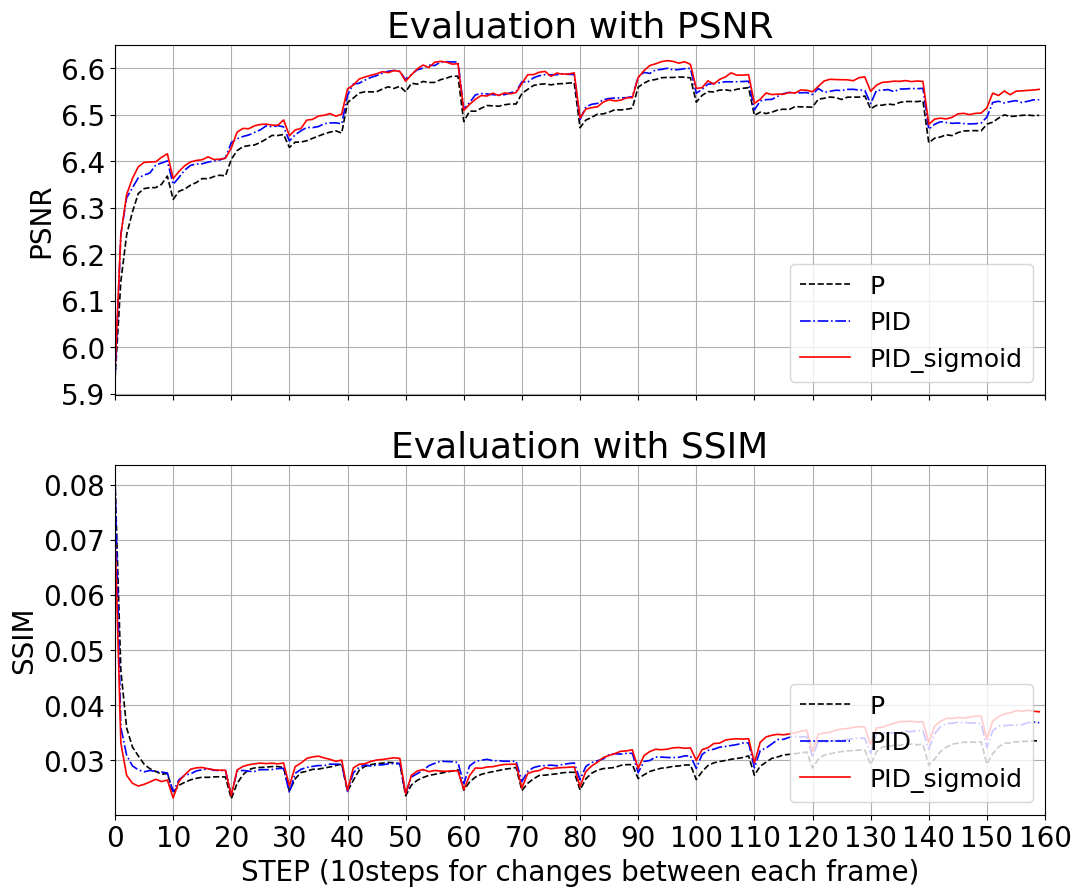

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax1.plot(psnr_P, color='k',linestyle='--', lw=1.2, label='P')
ax1.plot(psnr_PID, color='b',linestyle='-.', lw=1.2, label='PID')
ax1.plot(psnr_P_sig_ID, color='r',linestyle='-', lw=1.2, label='PID_sigmoid')

ax1.legend(fontsize=18,loc='lower right')
ax1.set_title('Evaluation with PSNR', fontsize=26)
ax1.set_ylabel('PSNR', fontsize=24)
ax1.grid(True)

ax2.plot(ssim_P, color='k',linestyle='--', lw=1.2, label='P')
ax2.plot(ssim_PID, color='b',linestyle='-.', lw=1.2, label='PID')
ax2.plot(ssim_P_sig_ID, color='r',linestyle='-', lw=1.2, label='PID_sigmoid')

ax2.legend(fontsize=18, loc='lower right')
ax2.set_title('Evaluation with SSIM', fontsize=26)
ax2.set_ylabel('SSIM', fontsize=24)
ax2.grid(True)

ax2.set_xlabel('STEP (10steps for changes between each frame)', fontsize=24)
ax2.set_xlim(0,160)
ax2.set_xticks(np.arange(0,161,10))

for ax in [ax1, ax2]:
    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)

plt.show()

### Fig.7 Initial Distribution

In [6]:
psnr_PIDsig_78 = []
ssim_PIDsig_78 = []
img_org = cv2.imread(f'gif\\img_4\\frame_008.png', cv2.IMREAD_GRAYSCALE)
for ite in range(1,101):
    img_ms = cv2.imread(f'chatrad_result\\test4\\PID_sig_7to8\\frame_8_step_{ite}.png', cv2.IMREAD_GRAYSCALE)
    PSNR = cv2.PSNR(img_org, img_ms)
    psnr_PIDsig_78.append(PSNR)
    SSIM = ssim(img_org, img_ms)
    ssim_PIDsig_78.append(SSIM)
psnr_PIDsig_08 = []
ssim_PIDsig_08 = []
img_org = cv2.imread(f'gif\\img_4\\frame_008.png', cv2.IMREAD_GRAYSCALE)
for ite in range(1,101):
    img_ms = cv2.imread(f'chatrad_result\\test4\\PID_sig_0to8\\frame_8_step_{ite}.png', cv2.IMREAD_GRAYSCALE)
    PSNR = cv2.PSNR(img_org, img_ms)
    psnr_PIDsig_08.append(PSNR)
    SSIM = ssim(img_org, img_ms)
    ssim_PIDsig_08.append(SSIM)

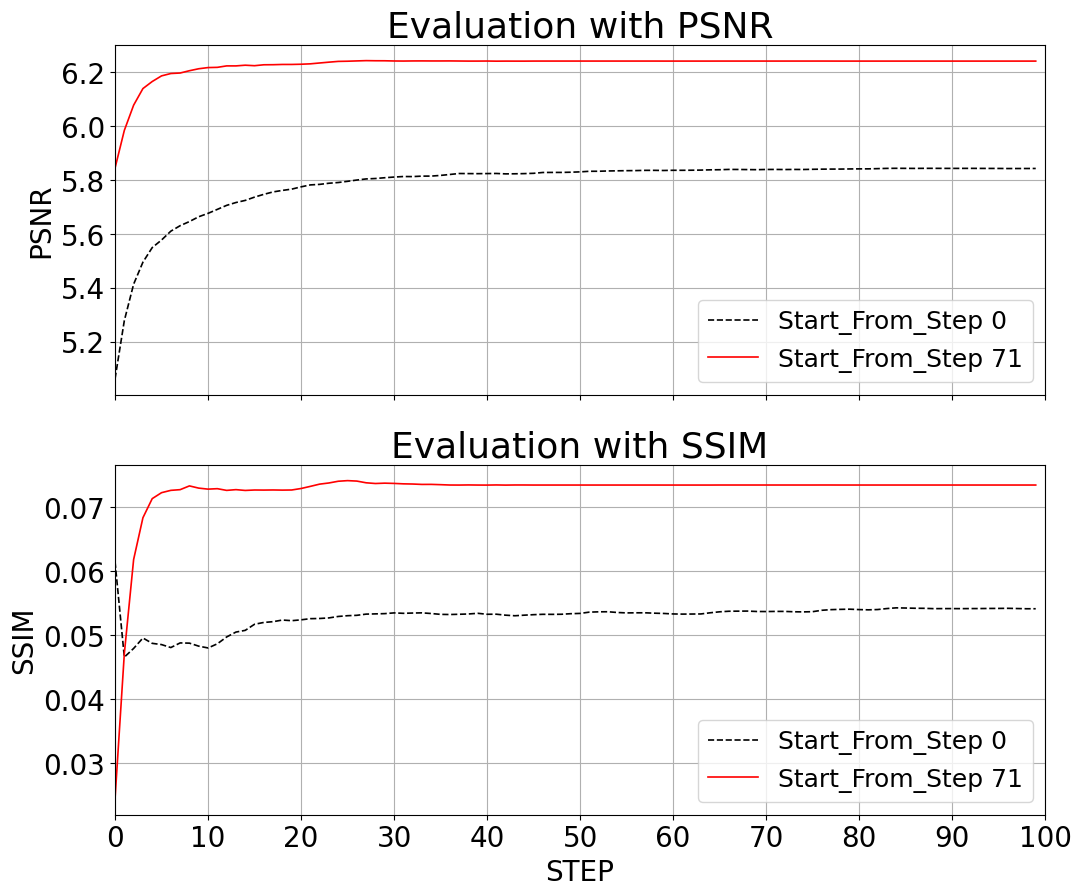

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax1.plot(psnr_PIDsig_08, color='k',linestyle='--', lw=1.2, label='Start_From_Step 0')
ax1.plot(psnr_PIDsig_78, color='r',linestyle='-', lw=1.2, label='Start_From_Step 71')
ax1.legend(fontsize=18, loc='lower right')
ax1.set_title('Evaluation with PSNR', fontsize=26)
ax1.set_ylabel('PSNR', fontsize=24)
ax1.grid(True)

ax2.plot(ssim_PIDsig_08, color='k',linestyle='--', lw=1.2, label='Start_From_Step 0')
ax2.plot(ssim_PIDsig_78, color='r',linestyle='-', lw=1.2, label='Start_From_Step 71')
ax2.legend(fontsize=18, loc='lower right')
ax2.set_title('Evaluation with SSIM', fontsize=26)
ax2.set_ylabel('SSIM', fontsize=24)
ax2.grid(True)

ax2.set_xlabel('STEP', fontsize=24)
ax2.set_xlim(0,100)
ax2.set_xticks(np.arange(0,101,10))

for ax in [ax1, ax2]:
    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)

plt.show()

### Loop

In [3]:
line_styles = ['-', ':', '--', '-.']
colors = [ 'r', 'k', 'g', 'b']

In [5]:
fr = 16
st = 10

psnr_list = []
ssim_list = []

for loop in range(10):  
    psnr_loop = []
    ssim_loop = []
    print(f"Processing Loop {loop+1}...") 
    for frame in range(fr):  
        img_org = cv2.imread(f'gif\\img_4\\frame_{frame+1:03d}.png', cv2.IMREAD_GRAYSCALE)
        for ite in range(1, st + 1):
            img_ms = cv2.imread(f'pre-train\\test4\\001\\loop{loop+1}\\frame_{frame+1}_step_{ite}.png', cv2.IMREAD_GRAYSCALE)
            PSNR = cv2.PSNR(img_org, img_ms)
            psnr_loop.append(PSNR)
            SSIM = ssim(img_org, img_ms)
            ssim_loop.append(SSIM)
    
    psnr_list.append(psnr_loop)
    ssim_list.append(ssim_loop)


Processing Loop 1...
Processing Loop 2...
Processing Loop 3...
Processing Loop 4...
Processing Loop 5...
Processing Loop 6...
Processing Loop 7...
Processing Loop 8...
Processing Loop 9...
Processing Loop 10...


In [12]:
plt.figure(figsize=(12,5))

for i, psnr_loop in enumerate(psnr_list, start=1):
plt.plot(psnr_loop, color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], lw=0.7, label=f'Loop {psnr_list.index(psnr_loop) + 1}')
plt.legend(fontsize=18, loc='lower right')
plt.title('Evaluation with PSNR', fontsize=26)
plt.ylabel('PSNR', fontsize=24)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.xlabel('STEP', fontsize=24)
plt.xlim(0, 160)  
plt.xticks(np.arange(0, 161, 10))  

plt.savefig('pre-train\\test4\\evaluation_psnr', bbox_inches='tight')
plt.close()  


plt.figure(figsize=(12,5))

for i, ssim_loop in enumerate(ssim_list, start=1):
plt.plot(ssim_loop, color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], lw=0.7, label=f'Loop {ssim_list.index(ssim_loop) + 1}')
plt.legend(fontsize=18, loc='lower right')
plt.title('Evaluation with SSIM', fontsize=26)
plt.ylabel('SSIM', fontsize=24)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.xlabel('STEP', fontsize=24)
plt.xlim(0, 160)  
plt.xticks(np.arange(0, 161, 10))  

plt.savefig('pre-train\\test4\\evaluation_ssim', bbox_inches='tight')
plt.close()  

plt.show()


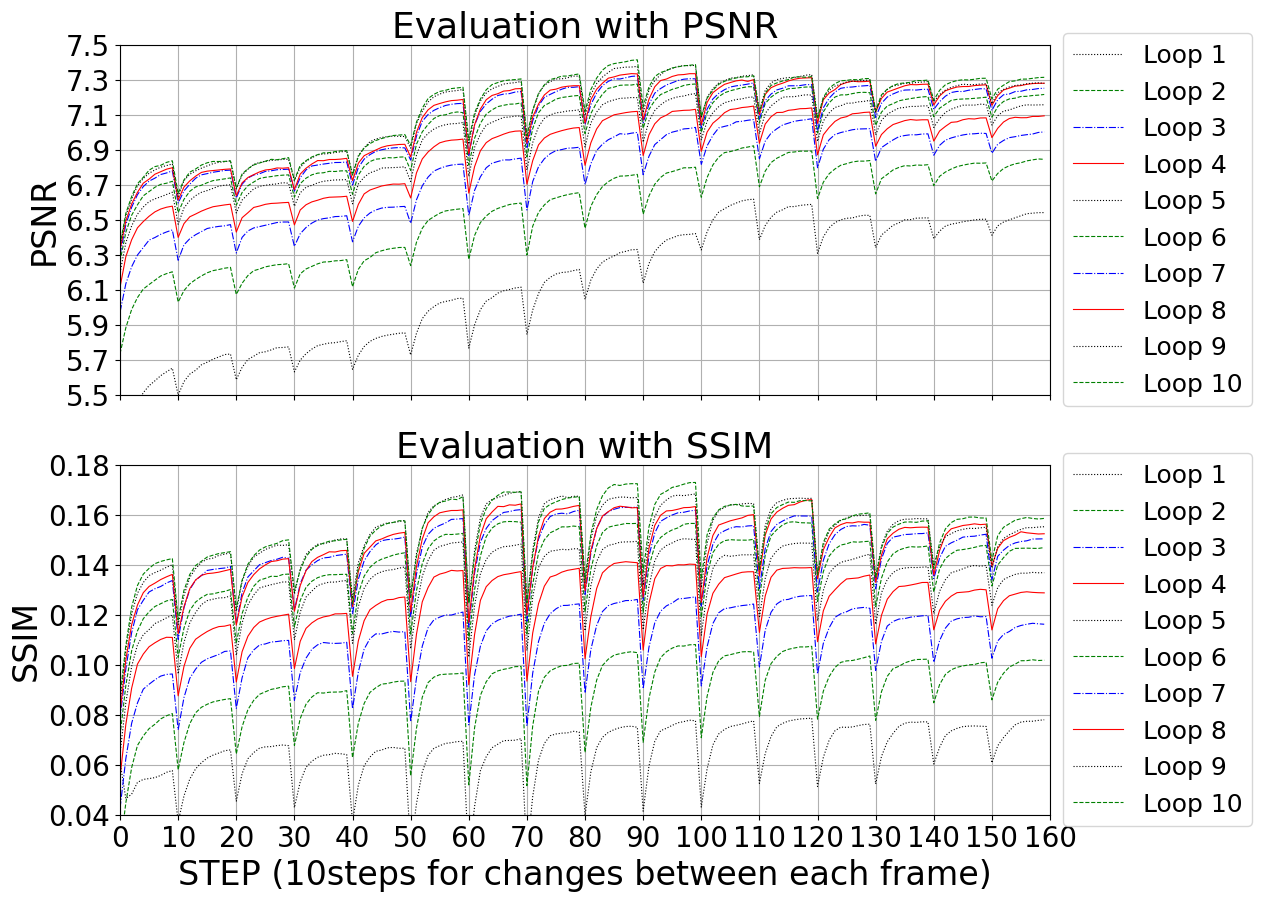

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

for i, psnr_loop in enumerate(psnr_list, start=1):
    axes[0].plot(psnr_loop, color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], lw=0.8, label=f'Loop {psnr_list.index(psnr_loop) + 1}')
axes[0].legend(fontsize=18, loc='center left', bbox_to_anchor=(1, 0.5))
axes[0].set_title('Evaluation with PSNR', fontsize=26)
axes[0].set_ylabel('PSNR', fontsize=24)
# axes[0].set_xlim(110,160)
axes[0].set_ylim(5.5,7.5)
axes[0].set_yticks(np.arange(5.5,7.6,0.2))
axes[0].grid(True)
axes[0].tick_params(axis='both', which='major', labelsize=20) 

for i, ssim_loop in enumerate(ssim_list, start=1):
    axes[1].plot(ssim_loop, color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], lw=0.8, label=f'Loop {ssim_list.index(ssim_loop) + 1}')
axes[1].legend(fontsize=18, loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].set_title('Evaluation with SSIM', fontsize=26)
axes[1].set_ylabel('SSIM', fontsize=24)
# axes[1].set_xlim(110,160)
axes[1].set_ylim(0.04,0.18)
axes[1].set_yticks(np.arange(0.04,0.19,0.02))
axes[1].grid(True)
axes[1].tick_params(axis='both', which='major', labelsize=20) 

axes[1].set_xlabel('STEP (10steps for changes between each frame)', fontsize=24)
axes[1].set_xlim(0,160)
axes[1].set_xticks(np.arange(0,161,10))


# plt.savefig('D:\\Lenovo\\mg_gif\\pre-train\\test4\\001\\enlarge_evaluation', bbox_inches = 'tight')
plt.show()
